# Wine Testing

### importing necessary libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as acc

### Dataset Preparation

In [109]:
wine_df = pd.read_csv('D:\Ashish\Coding\Programs\data\Wine_Samples\WineQT.csv')
#wine_df.info()
#wine_df.columns
missing_ind = wine_df.isnull().index
missing_ind

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ashis\AppData\Local\Temp\ipykernel_22972\3373785205.py:1: SyntaxWarning: invalid escape sequence '\A'
  wine_df = pd.read_csv('D:\Ashish\Coding\Programs\data\Wine_Samples\WineQT.csv')


RangeIndex(start=0, stop=1143, step=1)

### EDA

In [110]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


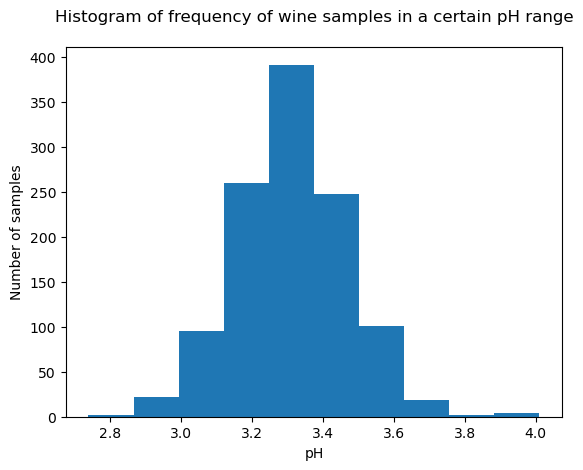

In [111]:
plt.title('Histogram of frequency of wine samples in a certain pH range\n')
pH_hist = wine_df['pH'].plot(kind='hist')
pH_hist.set_xlabel('pH')
pH_hist.set_ylabel('Number of samples')
plt.show()

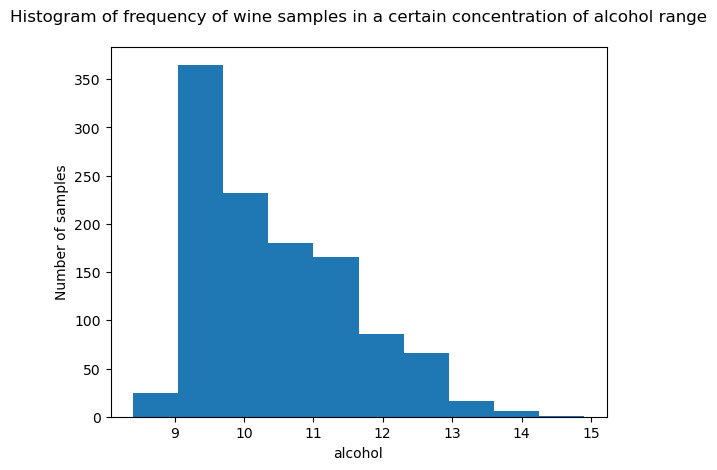

In [112]:
plt.title('Histogram of frequency of wine samples in a certain concentration of alcohol range\n')
alcohol_hist = wine_df['alcohol'].plot(kind='hist')
alcohol_hist.set_xlabel('alcohol')
alcohol_hist.set_ylabel('Number of samples')
plt.show()

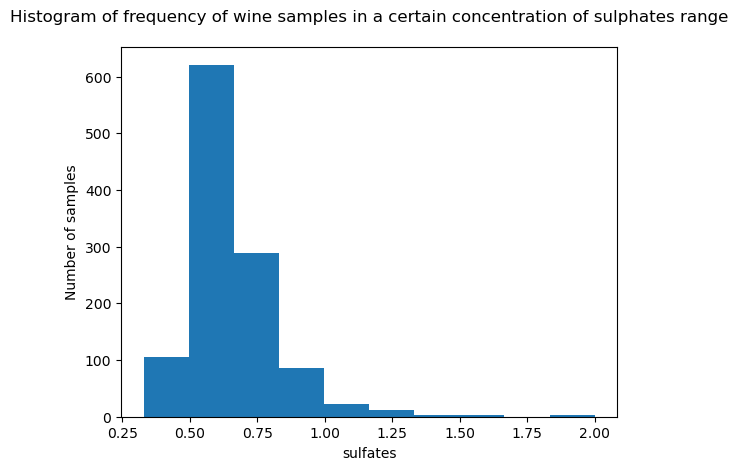

In [113]:
plt.title('Histogram of frequency of wine samples in a certain concentration of sulphates range\n')
sulphates_hist = wine_df['sulphates'].plot(kind='hist')
sulphates_hist.set_xlabel('sulfates')
sulphates_hist.set_ylabel('Number of samples')
plt.show(sulphates_hist)

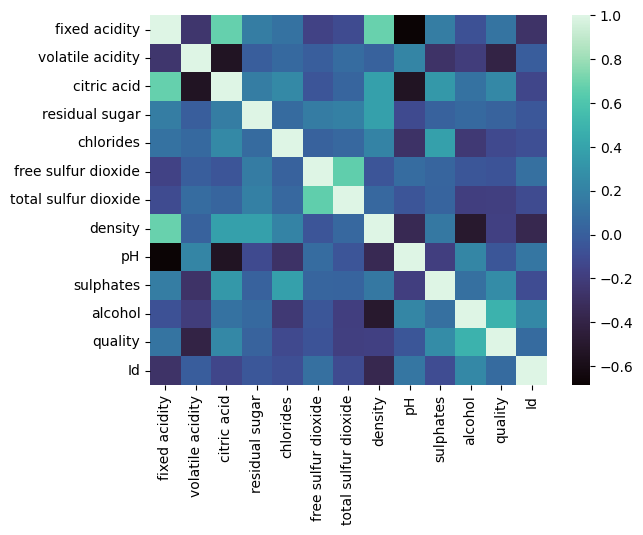

In [114]:
corr = wine_df.corr()
dataplot = sb.heatmap(corr, cmap="mako")

### Binning Quality Scores

In [116]:
wine_df['bool quality']=[int(x>=7) for x in wine_df['quality']]

### Splitting the data

In [137]:
rand_df = wine_df.sample(frac=1)
X_train = rand_df.drop(['quality','bool quality'],axis=1).iloc[:int(0.8 * len(wine_df)), :]
X_test = rand_df.drop(['quality','bool quality'],axis=1).iloc[int(0.8 * len(wine_df)):, :]
Y_train = rand_df['bool quality'].iloc[:int(0.8 * len(wine_df))]
Y_test =rand_df['bool quality'].iloc[int(0.8 * len(wine_df)):]

### Making the logistic regression

In [140]:
model = LR(max_iter=1124)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
accuracy = acc(Y_test, pred)
print("Accuracy:", accuracy*100)

Accuracy: 91.70305676855895
